In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the datasets
X_train = pd.read_csv('/content/drive/MyDrive/Modeling-Earthquake-Damage-main/Resources/Processed data/X_train_processed.csv', header = None)
y_train = pd.read_csv('/content/drive/MyDrive/Modeling-Earthquake-Damage-main/Resources/Processed data/y_train_processed.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Modeling-Earthquake-Damage-main/Resources/Processed data/X_test_processed.csv', header = None)
y_test = pd.read_csv('/content/drive/MyDrive/Modeling-Earthquake-Damage-main/Resources/Processed data/y_test_processed.csv')

X_train.head(), y_train.head(), X_test.head(), y_test.head()


(         0         1         2         3         4         5         6   \
 0  0.747082 -0.431751  0.378133  0.220872  0.232501  0.442089 -1.373493   
 1 -0.026492 -1.551366  0.273038 -1.169424  1.046536  0.566434  0.504650   
 2  1.499628  0.526572  2.644983  2.924317  6.146281 -0.449825  0.059980   
 3 -0.445425  1.183950  0.754918 -0.868256  0.046806 -0.988437 -1.000963   
 4  0.269122  0.897501 -0.740030 -0.483209 -0.050316  0.012389  0.717192   
 
          7         8         9         10        11        12        13  \
 0  0.457332  0.547283 -0.300213 -0.142167  0.030204 -0.427902  0.019681   
 1 -0.364851  1.349203 -0.723616 -0.894207 -0.793982  0.472655  0.104144   
 2 -0.619301 -0.371914  1.275600  0.047106 -0.271545 -0.240779 -0.155099   
 3 -0.449803  1.635952  0.785759 -0.502600 -0.227238 -0.578829  0.314474   
 4 -1.489855  0.015274  1.130452  0.331977  0.496302 -0.281362  0.051201   
 
          14        15        16        17  
 0  0.312223 -0.590294 -0.096866 -0.523

In [3]:

if isinstance(y_train, pd.DataFrame):
    y_train = y_train['damage_grade']
if isinstance(y_test, pd.DataFrame):
    y_test = y_test['damage_grade']

y_train = y_train.squeeze()
y_test = y_test.squeeze()


In [4]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')


X_train shape: (208480, 18)
y_train shape: (208480,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import numpy as np
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.62767407, 0.62963105, 0.63943516, 0.65342185, 0.65217475,
       0.6541701 , 0.65363289, 0.65497592, 0.65372882, 0.65566662,
       0.65562825, 0.65712477, 0.65608872, 0.6566643 , 0.65547476,
       0.65599279, 0.6559736 , 0.6570864 , 0.65582011, 0.65545557])

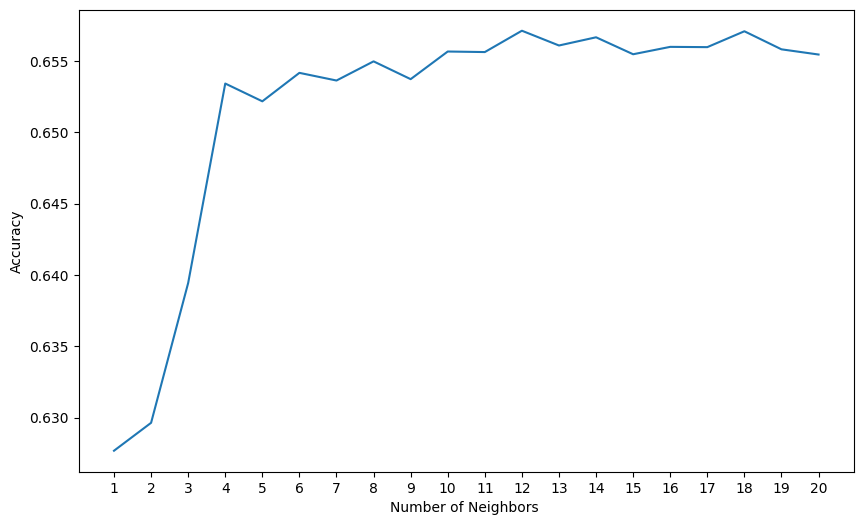

In [6]:
import matplotlib.pyplot as plt

# Plot the accuracy
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [7]:
# ERROR
# Tune hyperparameter
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [18,19,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 12 candidates, totalling 60 fits


({'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'},
 0.6613104374520338)

In [8]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20)

In [9]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [10]:
#Model Evaluation
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv =5)

print('Model accuracy: ',np.mean(scores))

Training set accuracy:  0.6891212586339217
Test set accuracy:  0.655455574528501
[[ 2183  2591   251]
 [ 1521 23694  4437]
 [  154  9004  8286]]
              precision    recall  f1-score   support

           1       0.57      0.43      0.49      5025
           2       0.67      0.80      0.73     29652
           3       0.64      0.48      0.54     17444

    accuracy                           0.66     52121
   macro avg       0.63      0.57      0.59     52121
weighted avg       0.65      0.66      0.64     52121

Model accuracy:  0.6495826937835764


In [11]:
# Calculate the weighted F1 score
weighted_f1 = f1_score(y_test, y_knn, average='weighted')

print(f'Weighted F1 Score: {weighted_f1}')

Weighted F1 Score: 0.6448601387932203


In [12]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined from the KNN model predictions
# Calculate accuracy
accuracy = accuracy_score(y_test, y_knn)

accuracy

0.655455574528501

In [13]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for KNN model
conf_matrix_knn = confusion_matrix(y_test, y_knn)

conf_matrix_knn

array([[ 2183,  2591,   251],
       [ 1521, 23694,  4437],
       [  154,  9004,  8286]])